In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset_path = '/content/datascience_salaries.csv'
df = pd.read_csv(dataset_path)

In [4]:
print(df.shape)

(1171, 7)


In [5]:
print(df.head())

   Unnamed: 0       job_title   job_type experience_level       location  \
0           0  Data scientist  Full Time           Senior  New York City   
1           2  Data scientist  Full Time           Senior         Boston   
2           3  Data scientist  Full Time           Senior         London   
3           4  Data scientist  Full Time           Senior         Boston   
4           5  Data scientist  Full Time           Senior  New York City   

  salary_currency  salary  
0             USD  149000  
1             USD  120000  
2             USD   68000  
3             USD  120000  
4             USD  149000  


In [9]:
conversion_rates = {
    'USD': 1.0,
    'EUR': 1.1  # 1 Euro = 1.1 USD
}

In [16]:
def convert_to_usd(row):
    return row['salary'] * conversion_rates.get(row['salary_currency'], 1)

In [31]:
df['salary'] = df.apply(convert_to_usd, axis=1)

In [32]:
scaler = MinMaxScaler()
df['salary_normalized'] = scaler.fit_transform(df[['salary']])

In [33]:
df.head()

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary,salary_normalized,salary_temp,pca_1
0,0,Data scientist,Full Time,Senior,New York City,USD,149000.0,0.601010,149000.0,0.424887
1,2,Data scientist,Full Time,Senior,Boston,USD,120000.0,0.454545,120000.0,0.278423
2,3,Data scientist,Full Time,Senior,London,USD,68000.0,0.191919,68000.0,0.015796
3,4,Data scientist,Full Time,Senior,Boston,USD,120000.0,0.454545,120000.0,0.278423
4,5,Data scientist,Full Time,Senior,New York City,USD,149000.0,0.601010,149000.0,0.424887


In [34]:
numerical_cols = ['salary_normalized']

In [35]:
pca = PCA(n_components=1)
pca_components = pca.fit_transform(df[numerical_cols])

In [36]:
df['pca_1'] = pca_components[:, 0]

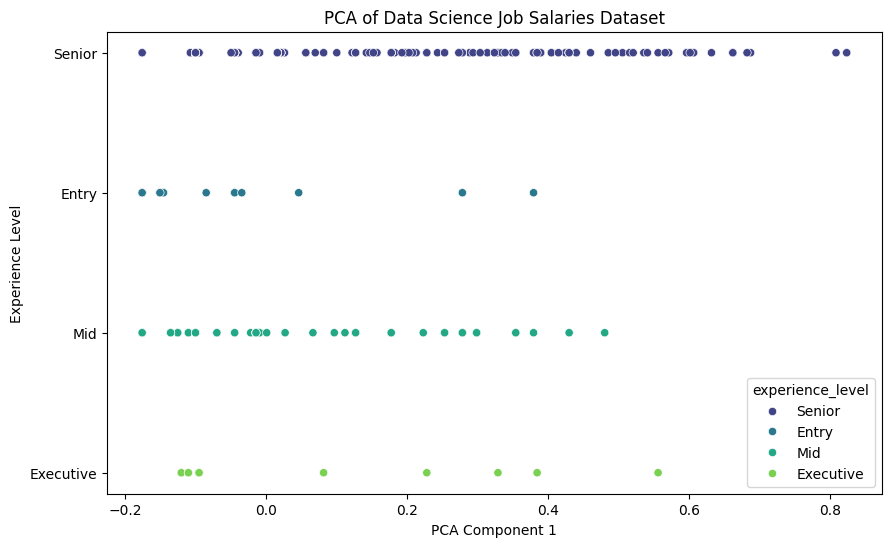

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_1', y='experience_level', data=df, hue='experience_level', palette='viridis')
plt.title('PCA of Data Science Job Salaries Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('Experience Level')
plt.show()

In [38]:
grouped_df = df.groupby('experience_level')['salary'].agg(['mean', 'median']).reset_index()
print("\nGroup-wise Analysis by Experience Level:\n")
print(grouped_df)


Group-wise Analysis by Experience Level:

  experience_level          mean   median
0            Entry  36111.111111  30000.0
1        Executive  76076.923077  46000.0
2              Mid  51861.245902  51000.0
3           Senior  75179.601100  68000.0


<ipython-input-39-5857ea062bd0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='experience_level', y='mean', data=grouped_df, palette='viridis')


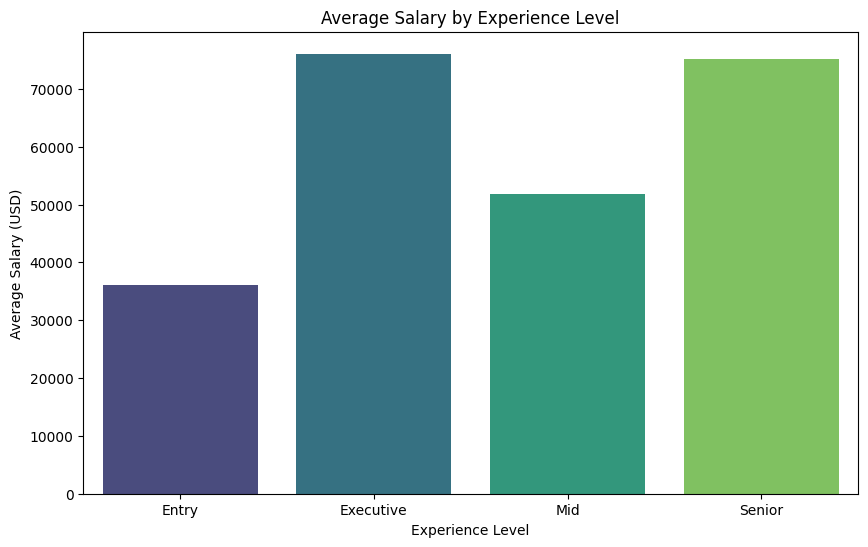

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x='experience_level', y='mean', data=grouped_df, palette='viridis')
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.show()

<ipython-input-40-d6b422f7c153>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='experience_level', y='median', data=grouped_df, palette='viridis')


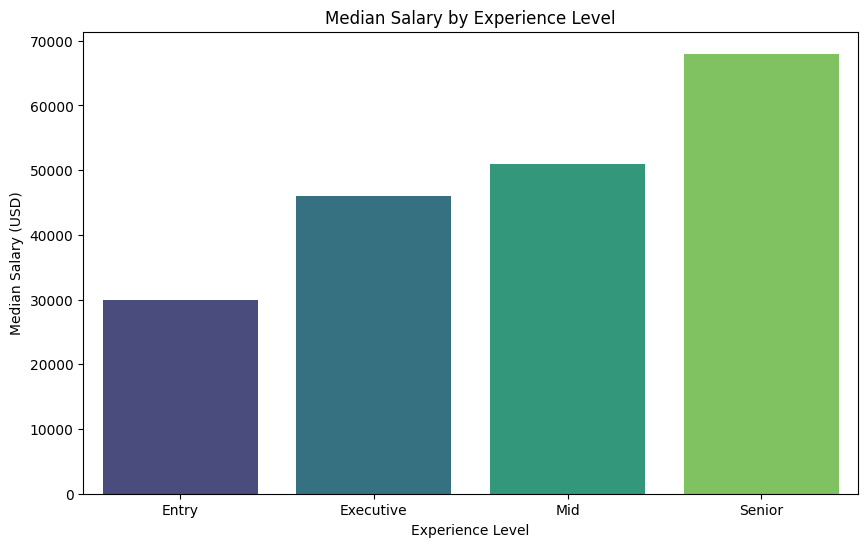

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x='experience_level', y='median', data=grouped_df, palette='viridis')
plt.title('Median Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Median Salary (USD)')
plt.show()